In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import json

In [2]:
rutas_archivos = [
    'Google/reviews-estados/review-Utah/1.json',
    'Google/reviews-estados/review-Utah/2.json',
    'Google/reviews-estados/review-Utah/3.json',
    'Google/reviews-estados/review-Utah/4.json',
    'Google/reviews-estados/review-Utah/5.json',
    'Google/reviews-estados/review-Utah/6.json',
    'Google/reviews-estados/review-Utah/7.json',
    'Google/reviews-estados/review-Utah/8.json',
    'Google/reviews-estados/review-Utah/9.json',
    'Google/reviews-estados/review-Utah/10.json',
    
]

In [3]:
todos_los_datos = []
# Iterar a través de cada archivo en la lista de rutas
for ruta_archivo in rutas_archivos:
    # Leer cada línea del archivo JSON
    with open(ruta_archivo, 'r') as f:
        for linea in f:
            # Cargar cada línea como un objeto JSON individual
            datos_json = json.loads(linea)
            # Agregar los datos al lista
            todos_los_datos.append(datos_json)


In [5]:
# Convertir a DataFrame de pandas
df_Utah= pd.json_normalize(todos_los_datos)

In [6]:
df_Utah.head()

,user_id,name,time,rating,text,pics,resp,gmap_id,resp.time,resp.text
0,111182595077674366891,Liz W Poch,1627085008811,5,Paige is the best! Everyone at this branch is ...,None,NaN,0x87528767d0ec0e4d:0x7a2f1637a6fb6925,NaN,NaN
1,117689170846448249054,Mario D'Ambrosio,1626437133578,1,I have updated my systems on two titles for ca...,None,NaN,0x87528767d0ec0e4d:0x7a2f1637a6fb6925,NaN,NaN
2,115834685654999484011,Kathleen Hambly,1585165423975,5,Simone is the best. She helped me to defer my ...,None,NaN,0x87528767d0ec0e4d:0x7a2f1637a6fb6925,NaN,NaN
3,112679611213731715979,Crystal Olsen,1591629458998,1,Ive called several times and there customer se...,None,NaN,0x87528767d0ec0e4d:0x7a2f1637a6fb6925,NaN,NaN
4,108599429350262421326,Sarah Jensen,1510264647735,5,My fiance and I had an awesome stress-free exp...,None,NaN,0x87528767d0ec0e4d:0x7a2f1637a6fb6925,1.514404e+12,Thank you for your kind review Sarah! Our staf...


In [7]:
df_Utah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 10 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user_id    1500000 non-null  object 
 1   name       1500000 non-null  object 
 2   time       1500000 non-null  int64  
 3   rating     1500000 non-null  int64  
 4   text       935940 non-null   object 
 5   pics       49380 non-null    object 
 6   resp       0 non-null        float64
 7   gmap_id    1500000 non-null  object 
 8   resp.time  251615 non-null   float64
 9   resp.text  251615 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 114.4+ MB


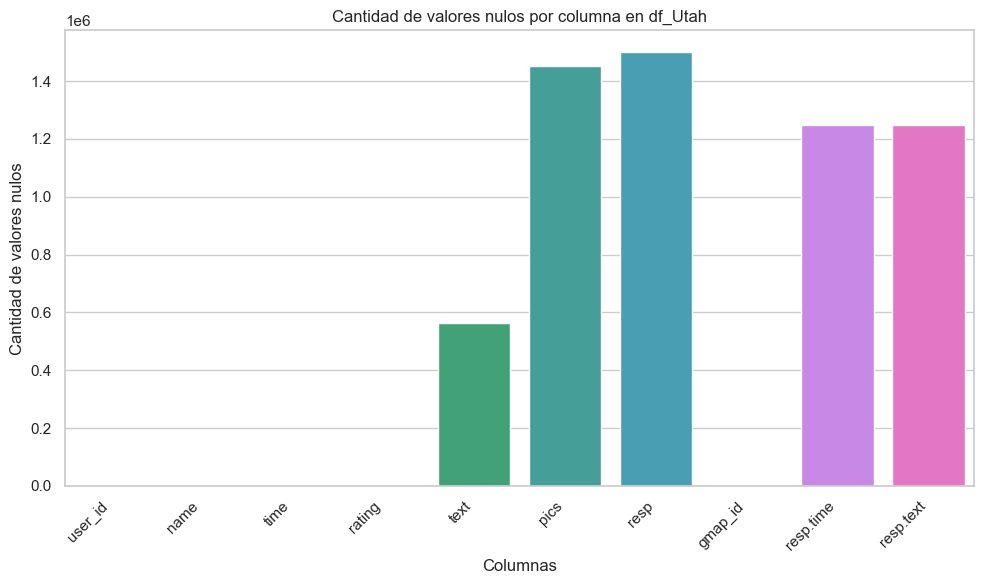

In [8]:
# Calcular el número de valores nulos en cada columna
nulos = df_Utah.isna().sum()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=nulos.index, y=nulos.values, palette='husl')
plt.title('Cantidad de valores nulos por columna en df_Utah')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores nulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Se observan gran cantidad de nulos en las columnas de respuestas y fotos, a continuacion la misma informacion pero en porcentage del total


In [9]:
# Calcular el número total de filas en el DataFrame
total_filas = len(df_Utah)
# Calcular el número de valores nulos en cada columna
nulos = df_Utah.isna().sum()
# Calcular los porcentajes de valores nulos en cada columna
porcentaje_nulos = (nulos / total_filas) * 100

In [10]:
porcentaje_nulos

user_id        0.000000
name           0.000000
time           0.000000
rating         0.000000
text          37.604000
pics          96.708000
resp         100.000000
gmap_id        0.000000
resp.time     83.225667
resp.text     83.225667
dtype: float64

La columna de resp, todos nulos, y pics se eliminaran debido a la poca informacion aportada. La coluna resp.time y resp.text se evaluara mas adelante debido a que puede tener influencia la tasa de respuesta de un local en el rating, ya que pueden mostrar interes en mejorar el servicio y aclarar dudas en sus potenciales clientes


Se eliminan las columnas innecesarias

In [12]:
# Eliminar las columnas 'time', 'resp' y 'pics'
df_Utah = df_Utah.drop(['resp', 'pics'], axis=1)

In [13]:
cantidad_filas_repetidas = df_Utah.duplicated().sum()
print("Cantidad de filas repetidas:", cantidad_filas_repetidas)

Cantidad de filas repetidas: 23190


Se convierte la columna time en una fecha legible para poder analizar la evolucion de las variables a travez del tiempo

In [14]:
# Convertir la columna 'time' a formato de fecha y hora
df_Utah['time'] = pd.to_datetime(df_Utah['time'], unit='ms')

# Crear una nueva columna con la fecha formateada como 'dd/mm/yyyy'
df_Utah['fecha'] = df_Utah['time'].dt.strftime('%d/%m/%Y')

In [15]:
df_Utah = df_Utah.drop(['time'], axis=1)

Se procede a evaluar los ratings

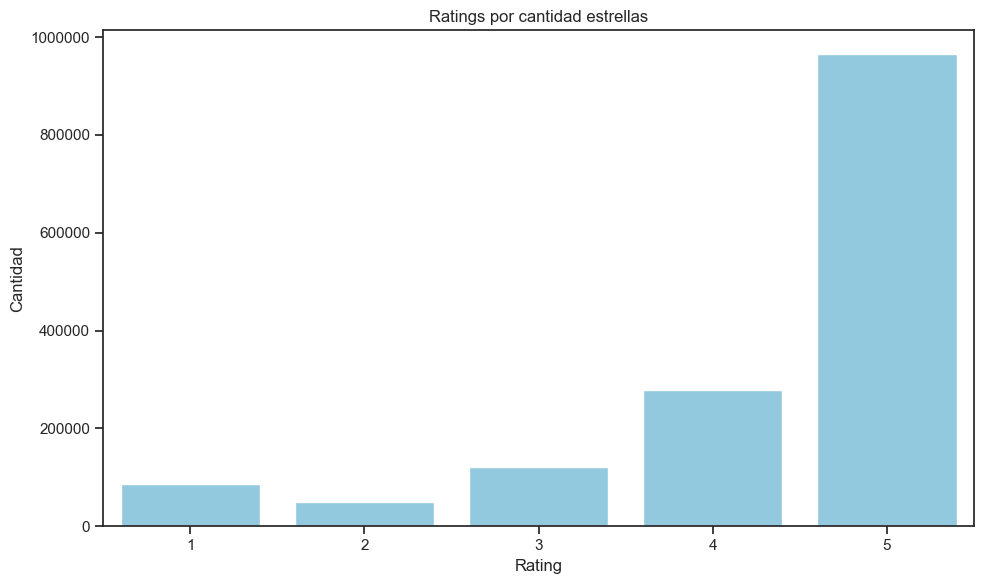

In [16]:
# Configurar el estilo de Seaborn
sns.set(style="ticks")
# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df_Utah, x='rating', color='skyblue')
plt.title('Ratings por cantidad estrellas')
plt.xlabel('Rating')
plt.ylabel('Cantidad')
# Desactivar la notación científica en el eje y
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

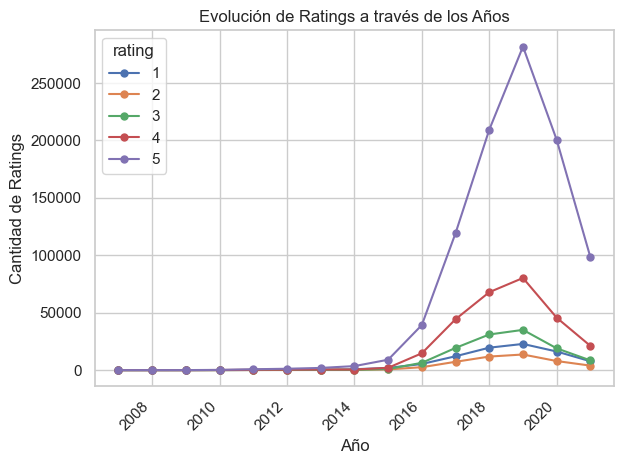

In [17]:
# Extraer el año de la columna 'fecha'
df_Utah['year'] = pd.to_datetime(df_Utah['fecha'], format='%d/%m/%Y').dt.year
# Agrupar por año y rating, y contar cuántas veces ocurre cada rating en cada año
rating_counts_by_year = df_Utah.groupby(['year', 'rating']).size().unstack(fill_value=0)
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")
# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))
rating_counts_by_year.plot(kind='line', marker='o', markersize=5)
plt.title('Evolución de Ratings a través de los Años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Se observa una cola hacia la derecha en la cantidad de reseñas por lo que veremos la cantidad de reseñas por año mas adelante

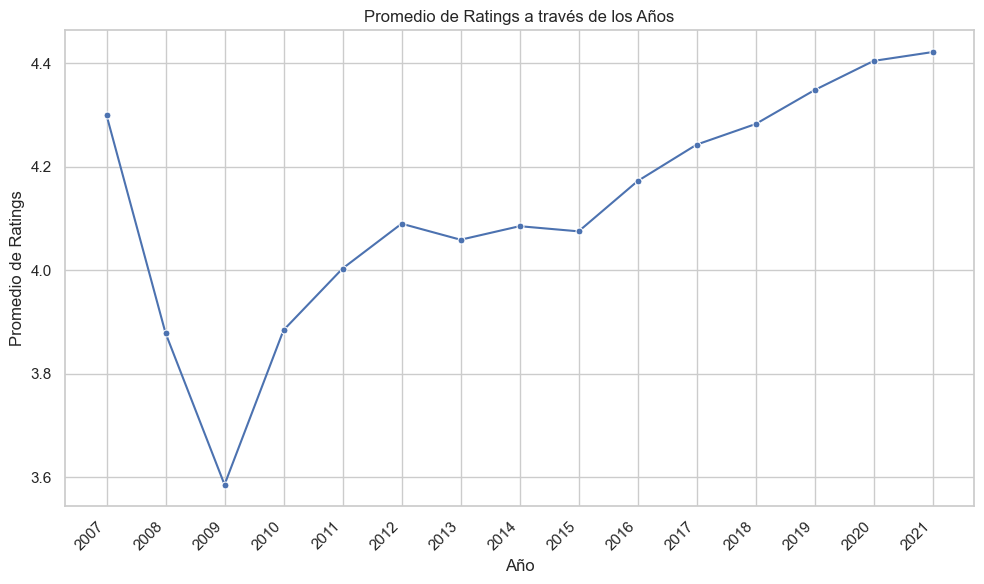

In [18]:
# Extraer el año de la columna 'fecha'
df_Utah['year'] = pd.to_datetime(df_Utah['fecha'], format='%d/%m/%Y').dt.year

# Calcular el promedio de todos los ratings para cada año
average_rating_by_year = df_Utah.groupby('year')['rating'].mean()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_rating_by_year, marker='o', markersize=5)
plt.title('Promedio de Ratings a través de los Años')
plt.xlabel('Año')
plt.ylabel('Promedio de Ratings')
plt.xticks(range(int(min(average_rating_by_year.index)), int(max(average_rating_by_year.index))+1), rotation=45, ha='right')
plt.tight_layout()
plt.show()

 Del 2007 al 2009 hay una gran caida, esto puede estar asociado a una baja cantidad de reseñas, en las cuales cada una tiene mayor peso dando lugar a grandes fluctuaciones en el promedio. Luego se ve una estabilizacion debido a mayor cantidad de reseñas probablemente, con una tendencia alcista en la satisfaccion de los clientes, lo que puede indicar que a mayor competencia mejor servicio.

Procedemos a ver la cantidad de reseñas por año

In [19]:
# Extraer el año de la columna 'fecha'
df_Utah['year'] = pd.to_datetime(df_Utah['fecha'], format='%d/%m/%Y').dt.year
# Contar el número de reseñas por año
reviews_per_year = df_Utah.groupby('year').size()
# Mostrar el resultado
print(reviews_per_year)

year
2007        10
2008        33
2009        70
2010       450
2011      1451
2012      2143
2013      3369
2014      5243
2015     14626
2016     68224
2017    202320
2018    339681
2019    433518
2020    289336
2021    139526
dtype: int64


Hay un constane crecimiento en la cantidad de reseñas hasta el año 2020, en el cual decrece. Esto se puede deber a la pandemia global de ese año